<a href="https://colab.research.google.com/github/WyvernCore/ICS3206---Machine-Learning-Expert-Systems-and-Fuzzy-Logic/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing required libraries

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree

### Uploading csv file to Google Colab

In [2]:
from google.colab import files 
uploaded = files.upload() #Used to upload csv file into Google Colab session

Saving voice.csv to voice.csv


### Checking CSV file contents

In [3]:
df = pd.read_csv('voice.csv') #loading the csv file using panda

In [4]:
df.head() #checking the head of the csv file

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
def unique(col):
   return df[col].nunique() #return count number of distinct elements in specified axis

TotalUnique = {} #create a dict to store the total amount of unique elements in csv ex label 2 {male, female}
for i in df.columns:
    value = unique(i)
    TotalUnique [i] = value

for key,value in TotalUnique.items():
    print(key, value)

meanfreq 3166
sd 3166
median 3077
Q25 3103
Q75 3034
IQR 3073
skew 3166
kurt 3166
sp.ent 3166
sfm 3166
mode 2825
centroid 3166
meanfun 3166
minfun 913
maxfun 123
meandom 2999
mindom 77
maxdom 1054
dfrange 1091
modindx 3079
label 2


In [6]:
x = df.iloc[:,:-1]
print(x) #get each value of each row without excluding the label

y = df.label #get the label of each row 
print(y)

      meanfreq        sd    median       Q25       Q75       IQR       skew  \
0     0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1     0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2     0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3     0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4     0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   
...        ...       ...       ...       ...       ...       ...        ...   
3163  0.131884  0.084734  0.153707  0.049285  0.201144  0.151859   1.762129   
3164  0.116221  0.089221  0.076758  0.042718  0.204911  0.162193   0.693730   
3165  0.142056  0.095798  0.183731  0.033424  0.224360  0.190936   1.876502   
3166  0.143659  0.090628  0.184976  0.043508  0.219943  0.176435   1.591065   
3167  0.165509  0.092884  0.183044  0.070072  0.250827  0.180756   1.705029   

             kurt    sp.ent       sfm      mode  ce

In [7]:
df['label'].value_counts() #print the amount of rows for the two designated labels 

male      1584
female    1584
Name: label, dtype: int64

### Splitting data into training and testing (67% Training, 33% Testing)

In [8]:
( x_train, 
  x_test,
  y_train,
  y_test  ) = train_test_split(x,y,test_size=0.33) #Using sk learn to split into 80% training and 20% testing

In [9]:
y_train.value_counts() #labels for training

male      1075
female    1047
Name: label, dtype: int64

In [10]:
y_test.value_counts() #labels for testing

female    537
male      509
Name: label, dtype: int64

KeyError: ignored

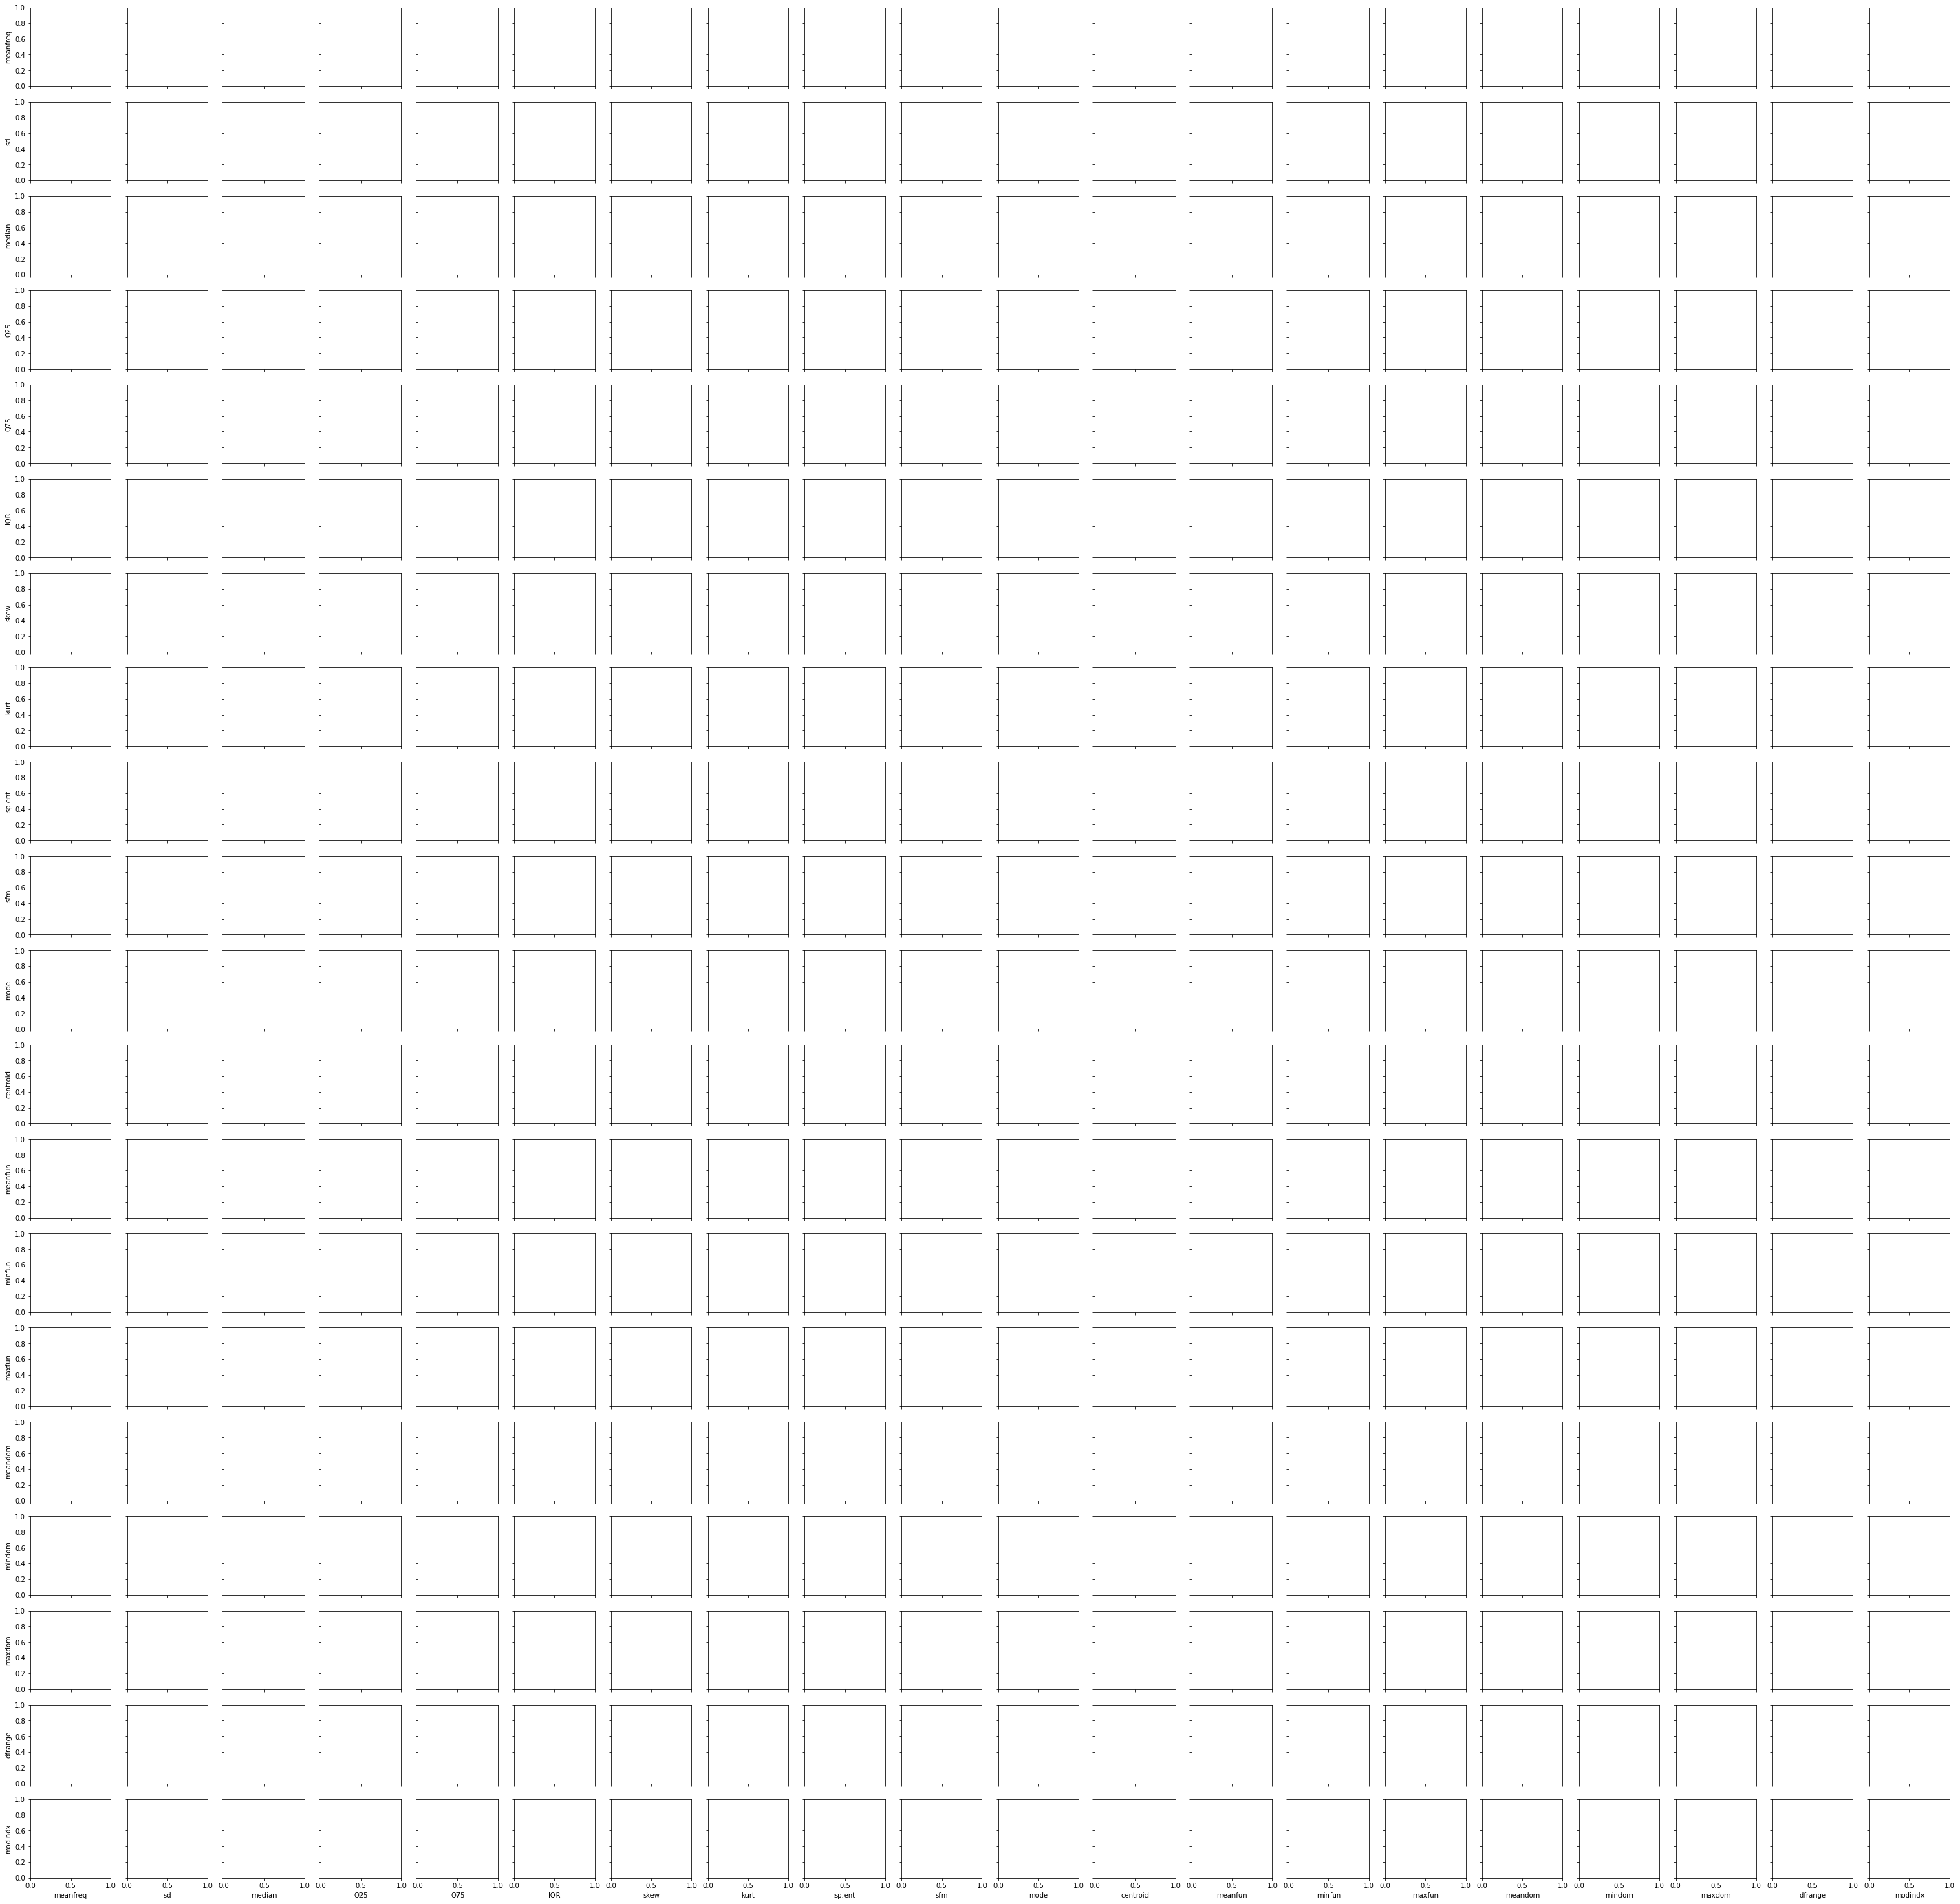

In [92]:
import seaborn as sns
sns.pairplot(df,hue='class',palette='Dark2')

In [65]:
def TuneParam(myGrid, myModel, x , y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  grid_search = GridSearchCV(estimator=myModel, param_grid=myGrid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
  grid_result = grid_search.fit(x, y)

  # summarize results
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
  means = grid_result.cv_results_['mean_test_score']
  stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']
  for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
  return grid_result.best_params_

### Decision Tree Classifier

In [68]:
modelDTC = DecisionTreeClassifier() #creating the DTC class
modelDTC.fit(x_train,y_train) #fitting the model with the values and labels 

DecisionTreeClassifier()

In [69]:
modelDTC.get_params() #get the default paramaters 

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

List of paramaters:

1.   max_depth -> How deep the tree can be
2.   criterion -> Function to measure quality of split either Gini or Entropy 
3.   splitter -> Strategy to choose split of each node to be either the best or random
4.   max_features -> number of features to consider each time to make the split decision
5.   random_state -> Controls the randomness of the estimator
6.   class_weight -> determines the weight (importance of a label)
7.   ccp_alpha -> Pruning of tree



In [71]:
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_features = ['auto', 'sqrt', 'log2']
max_depth = [3, 5, 7, 9]
ccp_alpha = [0.001, 0.01, 0.1]

grid = dict(criterion=criterion ,max_features=max_features, max_depth=max_depth, ccp_alpha=ccp_alpha )
DTCParams = TuneParam(grid, modelDTC, x_train , y_train)

Best: 0.956490 using {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'log2'}
0.902783 (0.045059) with: {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto'}
0.904686 (0.066041) with: {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt'}
0.913283 (0.046382) with: {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2'}
0.935928 (0.028621) with: {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto'}
0.948008 (0.023885) with: {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt'}
0.944715 (0.021978) with: {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2'}
0.955074 (0.018041) with: {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto'}
0.949426 (0.021270) with: {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt'}
0.948482 (0.021259) with: {'cc

In [72]:
modelDTC = DecisionTreeClassifier(**DTCParams) #creating the DTC class with hyperparamas
modelDTC.fit(x_train,y_train) #fitting the model with the values and labels 

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='log2')

In [73]:
predictions = modelDTC.predict(x_test)
predictions #models predictions for each row

array(['male', 'female', 'female', ..., 'female', 'female', 'male'],
      dtype=object)

In [74]:
probabilityPredict = modelDTC.predict_proba(x_test) #Predict the probability of each label
probabilityPredict #Since no early stopping is met then probabities are full

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [0.97058824, 0.02941176],
       [1.        , 0.        ],
       [0.        , 1.        ]])

DTC Evaluation

In [75]:
pd.crosstab(predictions,y_test,rownames=['matrix'],colnames=['confusion'], margins = True) #Confusion matrix of result

confusion,female,male,All
matrix,,,
female,524,22,546
male,13,487,500
All,537,509,1046


In [76]:
print("\t\t\tDecision Tree Class report:\n", classification_report(predictions,y_test)) #Printing the DTC's Precision, Recall and f1-score

			Decision Tree Class report:
               precision    recall  f1-score   support

      female       0.98      0.96      0.97       546
        male       0.96      0.97      0.97       500

    accuracy                           0.97      1046
   macro avg       0.97      0.97      0.97      1046
weighted avg       0.97      0.97      0.97      1046



In [77]:
print("Decision Tree Accuracy score: ", accuracy_score(predictions,y_test)*100,"%") #Printing DTC's accuracy score

Decision Tree Accuracy score:  96.65391969407266 %


In [78]:
feature_names = df.columns[:-1] #features names excluding labels
feature_names

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')

In [79]:
feature_importance = pd.DataFrame(modelDTC.feature_importances_, index=feature_names).sort_values(by=[0], ascending=False) #Give feature importance with the highest being the most important 
feature_importance

,0
IQR,0.554954
meanfun,0.139019
sd,0.094506
median,0.039918
Q25,0.029092
meanfreq,0.024096
Q75,0.023001
maxdom,0.013024
mode,0.011975
sfm,0.011577


In [80]:
features = list(feature_importance[feature_importance[0]>0].index) #Which features dont have an importance of zero
features

['IQR',
 'meanfun',
 'sd',
 'median',
 'Q25',
 'meanfreq',
 'Q75',
 'maxdom',
 'mode',
 'sfm',
 'modindx',
 'dfrange',
 'mindom',
 'sp.ent',
 'skew',
 'centroid',
 'minfun',
 'meandom',
 'kurt']

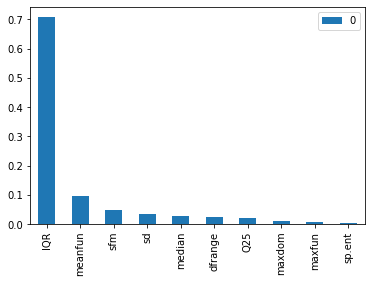

In [21]:
feature_importance.head(10).plot(kind='bar') #Bar chart with importance of features

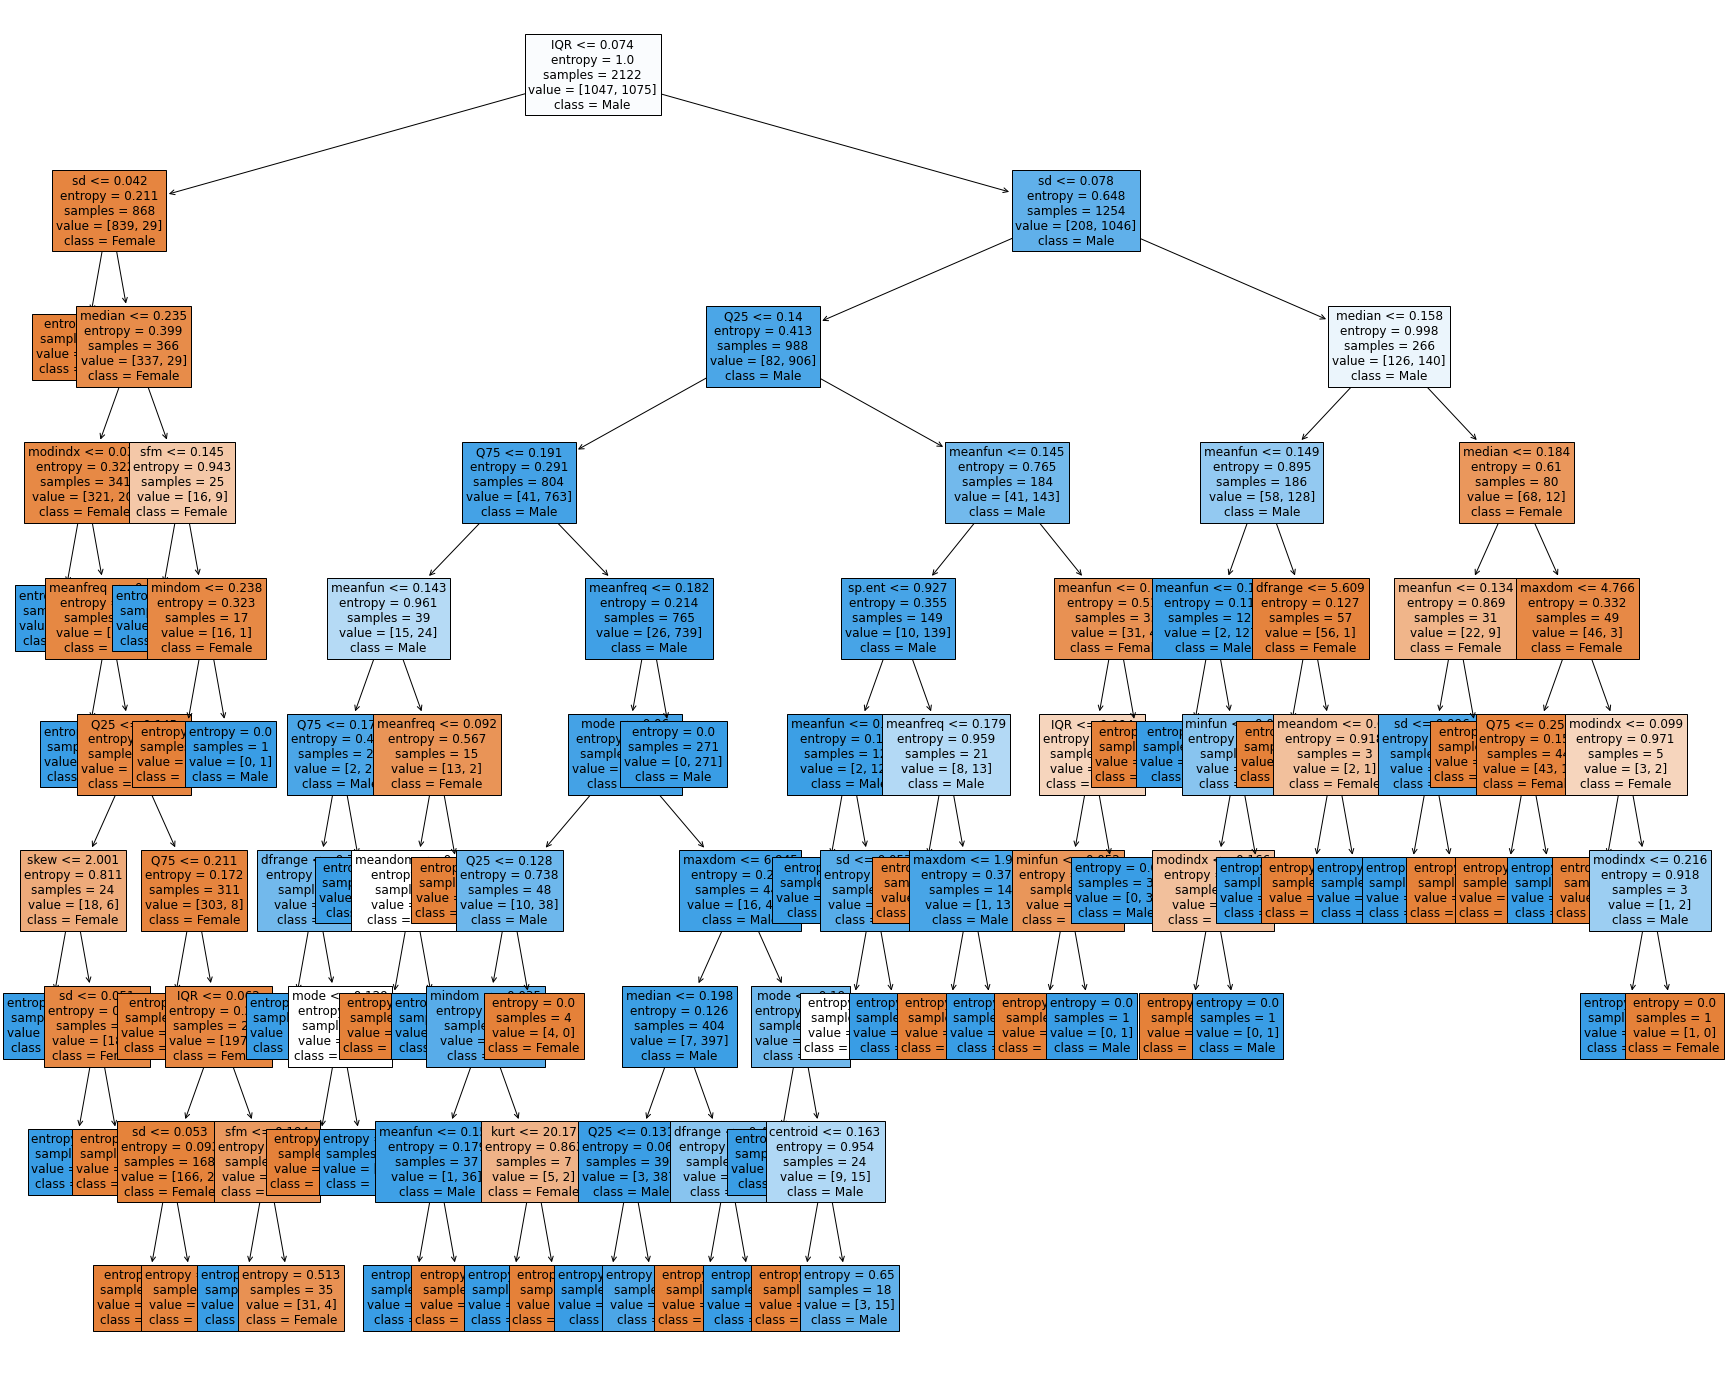

In [81]:
fig = plt.figure(figsize=(30,25)) #Plotting the Decision Tree
_ = tree.plot_tree(modelDTC,
                   feature_names=feature_names,
                   class_names={0:'Female', 1:'Male'},
                   filled=True,
                   fontsize=12
                  )

### Logistic Regression

In [25]:
modelLR = LogisticRegression() #creating the LR class with hyperparamas
modelLR.fit(x_train,y_train) #fitting the model with the values and labels

LogisticRegression(max_iter=10000)

In [26]:
modelLR.get_params() #get the default paramaters 

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [82]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = [100, 10, 1.0, 0.1, 0.01]
max_iter = [10, 100, 1000, 10000]

grid = dict(solver=solvers,C=c_values,max_iter=max_iter)
LRParams = TuneParam(grid, modelLR, x_train , y_train)

Best: 0.969850 using {'C': 100, 'max_iter': 100, 'solver': 'liblinear'}
0.858318 (0.047857) with: {'C': 100, 'max_iter': 10, 'solver': 'newton-cg'}
0.505968 (0.020959) with: {'C': 100, 'max_iter': 10, 'solver': 'lbfgs'}
0.652968 (0.090121) with: {'C': 100, 'max_iter': 10, 'solver': 'liblinear'}
0.969222 (0.012302) with: {'C': 100, 'max_iter': 100, 'solver': 'newton-cg'}
0.885800 (0.054099) with: {'C': 100, 'max_iter': 100, 'solver': 'lbfgs'}
0.969850 (0.012349) with: {'C': 100, 'max_iter': 100, 'solver': 'liblinear'}
0.969222 (0.012302) with: {'C': 100, 'max_iter': 1000, 'solver': 'newton-cg'}
0.967809 (0.013237) with: {'C': 100, 'max_iter': 1000, 'solver': 'lbfgs'}
0.969850 (0.012349) with: {'C': 100, 'max_iter': 1000, 'solver': 'liblinear'}
0.969222 (0.012302) with: {'C': 100, 'max_iter': 10000, 'solver': 'newton-cg'}
0.969535 (0.012123) with: {'C': 100, 'max_iter': 10000, 'solver': 'lbfgs'}
0.969850 (0.012349) with: {'C': 100, 'max_iter': 10000, 'solver': 'liblinear'}
0.856435 (0.04

In [54]:
modelLR = LogisticRegression(**LRParams) #creating the LR class with hyperparamas
modelLR.fit(x_train,y_train) #fitting the model with the values and labels

LogisticRegression(C=100, solver='liblinear')

In [55]:
predictionsLR = modelLR.predict(x_test)
predictionsLR #models predictions for each row

array(['male', 'female', 'female', ..., 'female', 'female', 'male'],
      dtype=object)

### LC Evaluation

In [56]:
pd.crosstab(predictionsLR,y_test,rownames=['matrix'],colnames=['confusion'], margins = True) #Confusion matrix of result

confusion,female,male,All
matrix,,,
female,523,12,535
male,14,497,511
All,537,509,1046


In [57]:
print("\t\t\tLog Reg Class report:\n",classification_report(predictionsLR,y_test))

			Log Reg Class report:
               precision    recall  f1-score   support

      female       0.97      0.98      0.98       535
        male       0.98      0.97      0.97       511

    accuracy                           0.98      1046
   macro avg       0.98      0.98      0.98      1046
weighted avg       0.98      0.98      0.98      1046



In [58]:
print("Log Reg Accuracy score: ",accuracy_score(predictionsLR,y_test)*100,"%")

Log Reg Accuracy score:  97.51434034416826 %


### Support Vector Machine (SVM)

In [87]:
modelSVM = SVC()
modelSVM.fit(x_train,y_train) #fitting the model with the values and labels

SVC()

In [88]:
modelSVM.get_params() #get the default paramaters 

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [91]:
kernel = ['poly', 'rbf', 'sigmoid', 'linear']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
#gamma = [1,0.1,0.01,0.001]
grid = dict(kernel=kernel,C=C,gamma=gamma)

SVMParams = TuneParam(grid, modelSVM, x_train , y_train)

Best: 0.970475 using {'C': 50, 'gamma': 'scale', 'kernel': 'linear'}
0.518999 (0.011412) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.692745 (0.024531) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.603065 (0.074962) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.970475 (0.010719) with: {'C': 50, 'gamma': 'scale', 'kernel': 'linear'}
0.512093 (0.009339) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.673572 (0.024084) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.602750 (0.074111) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.967493 (0.012697) with: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
0.503923 (0.005814) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.657083 (0.023183) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.605892 (0.073797) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.909689 (0.019711) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}
0.505968 (0.002770) with: {'C': 0.1, 'gamma': 'scal

In [ ]:
modelLR = LogisticRegression(**SVMParams) #creating the LR class with hyperparamas
modelLR.fit(x_train,y_train) #fitting the model with the values and labels